In [30]:
from tkinter import *
from tkinter import filedialog
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def Capture_Events(event,x,y,flags,params):
    if event == cv2.EVENT_LBUTTONDOWN:
        with open('../coordinate/'+params.split('/')[-1].split('.')[0]+'.txt', 'a') as f:
            f.write(str(x)+','+str(y)+'\n')

In [11]:
#fln=filedialog.askopenfilename(initialdir=os.getcwd(),title="Select Image File",filetypes=(("ALL FILES","*"),("JPG file","*.jpg"),("PNG file","*.png")))
for iter in range(100):
    fln=(f"../static/file{iter}.png")
    img = cv2.imread(fln,1)
    cv2.imshow('image',img)
    cv2.setMouseCallback('image',Capture_Events,param=fln)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
def multi_gaussian(pos, mu, si):
  n = mu.shape[0]
  Sig_det = np.linalg.det(si)
  Sig_inv = np.linalg.inv(si)
  N = np.sqrt((2*np.pi)**n * Sig_det)
  fac = np.einsum('...k,kl,...l->...', pos-mu, Sig_inv,pos-mu)
  return np.exp(-fac/2)/N

def gauss(x,y):
    mu = np.array([x,y])
    sd=np.std([640,480])
    Sigma = np.array([[sd,0],[0,sd]])
    X=np.linspace(0,640,640)
    Y=np.linspace(0,480,480)
    X, Y = np.meshgrid(X, Y)
    # print(X.shape+(2,))
    pos = np.empty(X.shape+(2,))
    pos[:,:,0] = X
    pos[:,:,1] = Y
    Z = multi_gaussian(pos, mu, Sigma)
    # plt.imshow(Z)
    # plt.show()
    Gaussian_Matrix.append(Z)

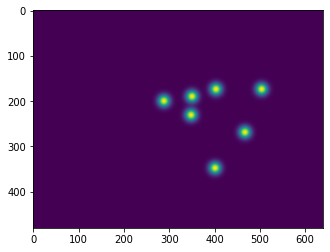

In [33]:
global Gaussian_Matrix, All_Gaussian_Matrix, Fourier_Matrix
Gaussian_Matrix = []
All_Gaussian_Matrix = []
Fourier_Matrix = []
l = os.listdir('../coordinate/')
Gaussian_Matrix = []
f = open('../coordinate/file10.txt', 'r')
co = f.read().split('\n')[:-1]
for j in co:
    x, y = j.split(',')
    gauss(int(x), int(y))
f.close()
M1M2arr = np.sum(Gaussian_Matrix, axis=0)
plt.imshow(M1M2arr)

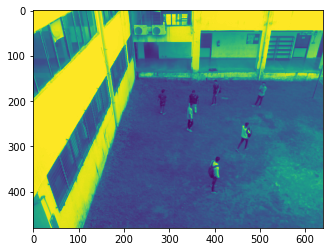

In [34]:
ig = cv2.imread("../static/file10.png", 0)
plt.imshow(ig)